<a href="https://colab.research.google.com/github/njones5714/Project-101/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv'

df = pd.read_csv(url)

df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [33]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['air_date'] = pd.to_datetime(df['air_date'])
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    55130 non-null  int64         
 1   season                   55130 non-null  int64         
 2   episode                  55130 non-null  int64         
 3   episode_name             55130 non-null  object        
 4   director                 55130 non-null  object        
 5   writer                   55130 non-null  object        
 6   character                55130 non-null  object        
 7   text                     54753 non-null  object        
 8   text_w_direction         55125 non-null  object        
 9   imdb_rating              55130 non-null  float64       
 10  total_votes              55130 non-null  int64         
 11  air_date                 55130 non-null  datetime64[ns]
 12  sentimentanalysis_score  51718 n

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [34]:
main_characters = ['Michael', 'Dwight', 'Jim', 'Pam', 'Angela', 'Kevin', 'Oscar', 'Stanley']
df_main =df[df['character'].isin(main_characters)]

/tmp/ipython-input-43-1114115706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_main, palette='pastel', x='character', y='sentimentanalysis_score')


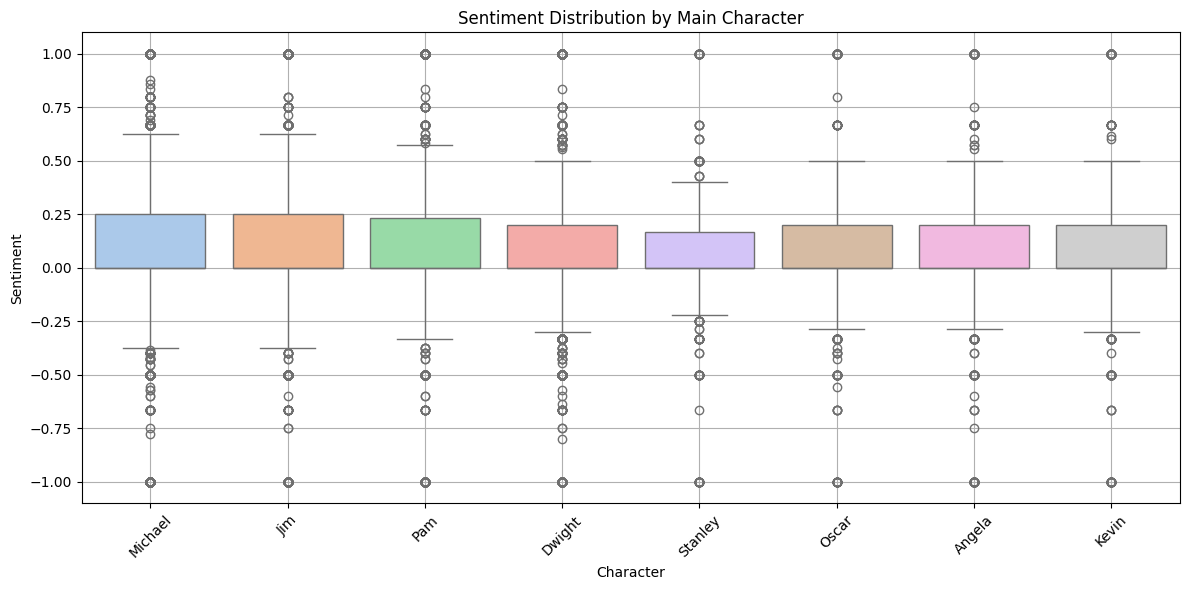

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_main, palette='pastel', x='character', y='sentimentanalysis_score')
plt.title('Sentiment Distribution by Main Character')
plt.xlabel('Character')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

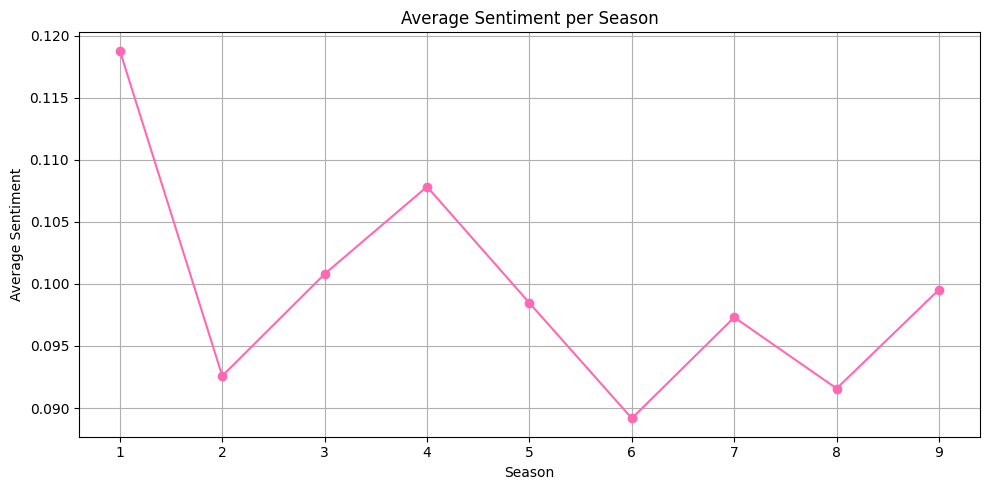

In [42]:
season_sentiment = df.groupby('season')['sentimentanalysis_score'].mean().reset_index()

plt.figure(figsize=(10,5))
season_sentiment = df.groupby('season')['sentimentanalysis_score'].mean()
season_sentiment.plot(marker='o', color='hotpink')
plt.title('Average Sentiment per Season')
plt.xlabel('Season')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()